<a id='multiclass_classification'></a>

# Reference Points
* <a href='#mnist'>MNIST Data</a>
* <a href='#training_binary_classifier'>Training Binary Classifier</a>
* <a href='#performance_measures'>Performance Measures</a>
* <a href='#multiclass_classification'>Multiclass Classification</a>

This notebook goes through Chapter 3 of "Hands-On Machine Learning with Scikit-Learn & TensorFlow". It works through a classification project using the MNIST dataset. The chapter includes binary classification and multiclass classification.

<a id='mnist'></a>

# MNIST

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

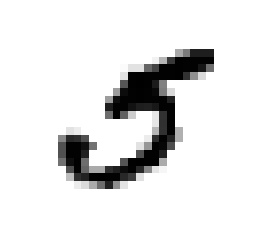

In [9]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[3600]

0.0

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
import numpy as np

* Shuffle the training set
* This helps in cross-validation phase - folds will be similar
* NOTE: shuffling may not be the best when it comes to time series data

In [13]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

<a id='training_binary_classifier'></a>

# Training Binary Classifier

* Identifying one-digit, hence binary classifier
    * Ex: Is it a 5, yes or no?

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

* Stochastic Gradient Descent Classifier - can efficiently handle large datasets
    * suitable for online learning
    * being that it is stochastic, there is randomness throughout training - set random_state parameter for reproducible results

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [17]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

<a id='performance_measures'></a>

# Performance Measures

* Many performance measures for classifiers
* Can be more difficult evaluating a classifier than a regressor

## Measuring Accuracy w/ CV

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [19]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [20]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9633
0.94235
0.96805


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9633 ,  0.94235,  0.96805])

In [23]:
from sklearn.base import BaseEstimator

In [24]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [25]:
never_5_clf = Never5Classifier()

In [26]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9104 ,  0.911  ,  0.90755])

* Accuracy not best perforamce measurement
    * The above example shows you could guess it is not a 5, 90% of time since 10% of the dataset is made up of 5's
    * If dealing skewed dataset, definitely best to not use accuracy 

## Confusion Matrix

* Better way to to evaluate performance when using classifiers

In [27]:
from sklearn.model_selection import cross_val_predict

* cross_val_predict() - returns actual predictions instead of scores

In [28]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

* Rows - actual class
    * 1st Row - Negative Class
    * 2nd Row - Positive Class
* Columns - predicted class

In [30]:
confusion_matrix(y_train_5, y_train_pred)

array([[53972,   607],
       [ 1919,  3502]])

* True Negatives: 53,972 (correctly classified as non-5's)
* False Positives: 607 (incorrectly classified as 5's)


* False Negatives: 1,919 (incorrectly classified as non-5's)
* True Positives: 3,502 (correctly classified as 5's)

## Precision / Recall

In [31]:
from sklearn.metrics import precision_score, recall_score

* Precision - accuracy of the positive predictions
    * Formula: TP / (TP + FP)

In [32]:
precision_score(y_train_5, y_train_pred)

0.85227549282063764

* Recall (aka sensitivty or True Posititve Rate) - ratio of positive instances that are correctly detected
    * Formula: TP / (TP + FN)

In [33]:
recall_score(y_train_5, y_train_pred)

0.64600627190555249

* The classifier is not as good as originally reported when looking at accuracy
    * Correct 85% of the time
    * Detects just 64.6% of the 5's

In [34]:
from sklearn.metrics import f1_score

* F1 Score - harmonic mean of precision and recall
    * Harmonic Mean - gives more weight to low values
    * Score allows for a simple way to compare two classifiers
    * Favors classifiers that have similar precision and recall scores

In [35]:
f1_score(y_train_5, y_train_pred)

0.73494228751311641

## Precision / Recal Tradeoff

* Increasing precision reduces recall
* Increasing recall reduces precision

* How SGDClassifier makes decisions:
    * computes a score based on a desicion function for each instance
    * score > threshold = assigns instance to positive class
        * if not, assigned to negative class

* Cannot set threshold directly in scikit-learn
* Use decision_function() instead of predict() to get a score for each instance
* By obtaining the score, can now make predictions with the scores against a threshold you set

In [36]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 27772.49356205])

In [37]:
threshold = 0

In [38]:
y_some_digit_pred = (y_scores > threshold)

In [39]:
y_some_digit_pred

array([ True], dtype=bool)

In [40]:
threshold = 200000

In [41]:
y_some_digit_pred = (y_scores > threshold)

In [42]:
y_some_digit_pred

array([False], dtype=bool)

* Example above shows by raising threshold, it decreases recall

* Best to plot the precision-recall curve to help see which threshold to use

In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

In [44]:
from sklearn.metrics import precision_recall_curve

In [45]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [46]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

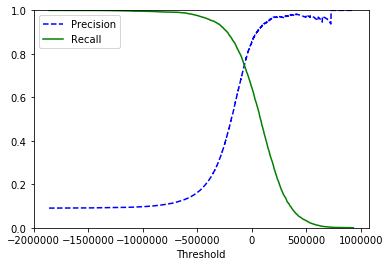

In [47]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [48]:
y_train_pred_90 = (y_scores > 200000)

In [49]:
precision_score(y_train_5, y_train_pred_90)

0.967984934086629

In [50]:
recall_score(y_train_5, y_train_pred_90)

0.28444936358605422

## ROC Curve

* Receiver Operating Characteristic (ROC) Curve - plots the true positive rate (aka recall) against the false positive rate (ratio of negative instances that are incorrectly classified as positive)
    * another tool for binary classifiers

In [51]:
from sklearn.metrics import roc_curve

In [52]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [53]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

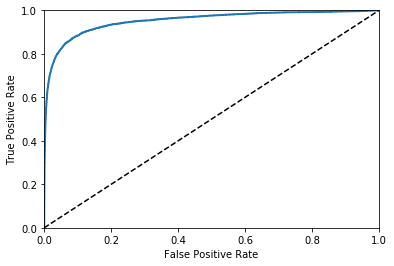

In [54]:
plot_roc_curve(fpr, tpr)
plt.show()

* Another trade-off can be seen:
    * higher the recall (TPR), the more false positives (FPR)
* Dotted Line = ROC curve of a pure random classifier
* Want a classifier that is far away from the dotted line as possible (towards top-left corner)

In [55]:
from sklearn.metrics import roc_auc_score

* Area Under the Curve (AUC):
    * another tool to help compare classifiers
    * AUC = 1 is a perfect classifier
    * AUC = 0.5 is a pure random classifier

In [56]:
roc_auc_score(y_train_5, y_scores)

0.9519729323915217

* ROC Curve or Precision/Recall Curve?
    * Use PR whenever the positive class is rare or false positives are more important

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
forest_clf = RandomForestClassifier(random_state=42)

In [59]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

In [60]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

In [61]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

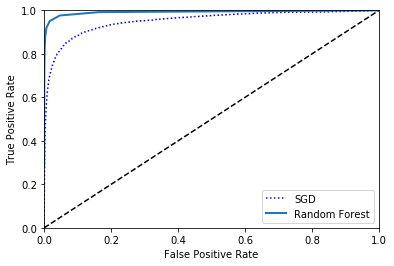

In [62]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

* As you can see above, RandomForestClassifier curve is better as it is closer to the top-left corner

In [63]:
roc_auc_score(y_train_5, y_scores_forest)

0.99203283868387493

<a id='multiclass_classification'></a>

# Multiclass Classification

* Multiclass Classifiers - distinguish between more than two classes
    * Some algos can handle multiple classes directly
        * Ex: Random Forest, Naive Bayes
    * Some algos are only binary classifiers
        * Ex: Support Vector Machines, Linear Classifiers
        * Strategies to work around so binary classifiers can perform multiclass classification
            * One-versus-One (OvO)
                * Would need to train N * (N-1) / 2, where N is number of classes
            * One-versus-All (OvA)
                * Ex: Train 10 binary classifiers, digits 0-9 (#-detector)
                * Preferred method when dealing with binary algo

* scikit-learn can determine when using a binary classifier for multiclass
    * will use OvA, except if it is a SVM Classifier

In [64]:
sgd_clf.fit(X_train, y_train) # y_train , not y_train_5

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [65]:
sgd_clf.predict([some_digit])

array([ 5.])

In [66]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-208286.65660808, -451432.77122639, -322775.80511691,
         -34418.92170153, -415450.18031609,   27772.49356205,
        -636405.6977221 , -259176.32221304, -695236.42731877,
        -771405.04158895]])

In [67]:
np.argmax(some_digit_scores)

5

In [68]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [69]:
from sklearn.multiclass import OneVsOneClassifier

In [70]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [71]:
len(ovo_clf.estimators_)

45

In [72]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [73]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [74]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.84863027,  0.88134407,  0.85087763])

In [75]:
from sklearn.preprocessing import StandardScaler

* Scaling inputs can help increase accuracy

In [76]:
scaler = StandardScaler()

In [77]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [78]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91066787,  0.90829541,  0.91228684])

## Error Analysis

In [79]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [80]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [81]:
conf_mx

array([[5729,    2,   22,   11,   10,   51,   44,   11,   39,    4],
       [   1, 6493,   40,   28,    6,   37,    8,   14,  102,   13],
       [  53,   38, 5348,  104,   70,   24,   87,   61,  154,   19],
       [  50,   39,  128, 5351,    3,  242,   30,   58,  133,   97],
       [  19,   30,   38,    7, 5356,    8,   50,   33,   83,  218],
       [  68,   41,   34,  198,   68, 4586,   99,   31,  191,  105],
       [  34,   23,   52,    2,   39,   89, 5619,    7,   53,    0],
       [  21,   20,   70,   28,   57,   10,    5, 5811,   15,  228],
       [  43,  159,   75,  151,   14,  161,   55,   26, 5027,  140],
       [  42,   33,   21,   82,  156,   34,    3,  192,   81, 5305]])

* Can be more convenient to plot the confusion matrix

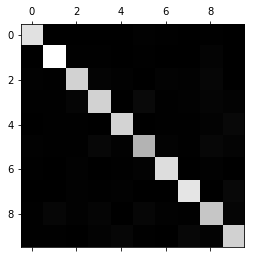

In [82]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [83]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

* To help better understand errors, we can focus in on them

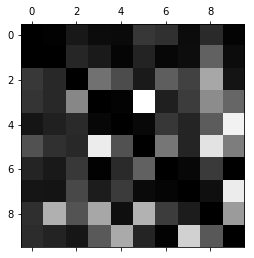

In [84]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

* As seen above, columns for classes 8 and 9 are brighter than most
    * This means images got misclassified as 8's or 9's
* Rows for classes 8 and 9 are also brighter than most
    * This means 8's and 9's are confused with other digits

## Multilabel Classification

* Classifier that outputs multiple classes for each instance
    * Ex: multiple faces in a photo

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [87]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [89]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

* Multiple ways to evaluate a Multilabel Classifier
* One way is using F1 Score
    * Get the score for each individual label, then average
    * NOTE: if some labels out weigh other labels, can give weight to classifier's score on those necessary classes
        * Switch "macro" to "weighted"

In [90]:
f1_score(y_train, y_train_knn_pred, average="macro")

0.96796052418551548

## Multioutput Classification

* Multioutput Classification - a generalization of multilabel classification where each label can have more than two possible values

In [93]:
noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

In [95]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [99]:
clean_digit = knn_clf.predict([X_test_mod[5]])

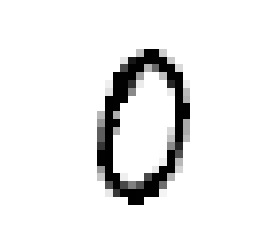

In [100]:
clean_digit_image = clean_digit.reshape(28, 28)

plt.imshow(clean_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

<a href='#top'>Take Me to The Top</a>